## Multi-Hazard Exposure and Urbanization

In [2]:
import pandas as pd
import geopandas as gpd
import numpy as np
import matplotlib.pyplot as plt
import xarray as xr

<Axes: >

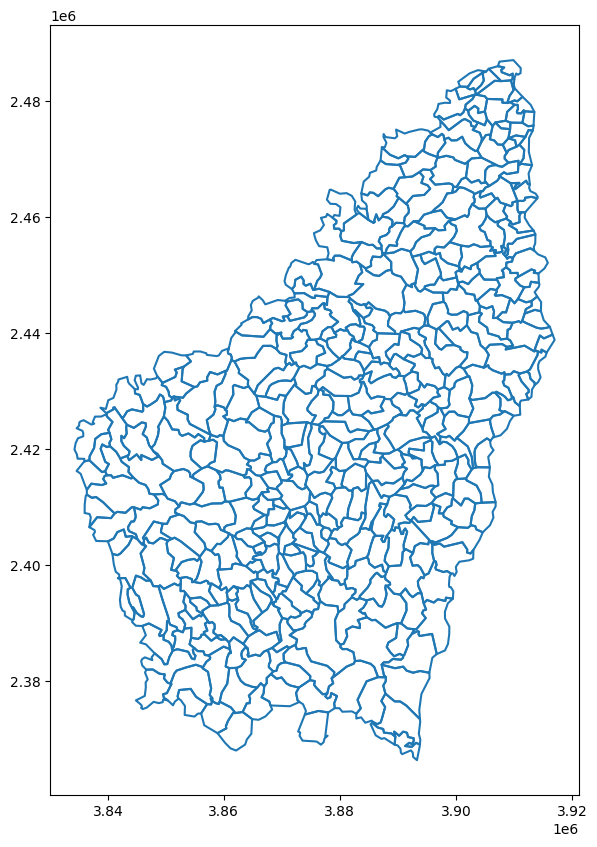

In [6]:
nuts3 = gpd.read_file('../../data/tiberiu/DATA_MH/LAU_2013.shp')
nuts3 = nuts3[nuts3['CNTRY'] == 'FR' ]

nuts3 = nuts3.to_crs(epsg=3035)
nuts3 = nuts3[nuts3.NUTS3_ID=='FR712']
nuts3['geometry'] = nuts3.buffer(10)
nuts3
# #plot nuts3
fig, ax = plt.subplots(figsize=(10, 10))
nuts3.boundary.plot(ax=ax)


### France Land-Use Change

In [7]:
import glob
import pandas as pd
import geopandas as gpd
import numpy as np
import matplotlib.pyplot as plt
import xarray as xr
import seaborn as sns

In [ ]:
lu_files = glob.glob("../../data/Copernicus land-use changes/region_land_use/u2006*.csv")
#load all files an dconcatenate them
df_2006 = pd.concat([pd.read_csv(f) for f in lu_files])

lu_files = glob.glob("../../data/Copernicus land-use changes/region_land_use/u2018*.csv")

df_2018 = pd.concat([pd.read_csv(f) for f in lu_files])

In [9]:
df_2006 = df_2006.sort_values('LAU_ID')
df_2018 = df_2018.sort_values('LAU_ID')
lu_changes = df_2018.copy()
lu_changes[['urban', 'cropland', 'forest', 'wetland']] = df_2018[['urban', 'cropland', 'forest', 'wetland']] - df_2006[['urban', 'cropland', 'forest', 'wetland']]
lu_changes[['urban', 'cropland', 'forest', 'wetland']] = lu_changes[['urban', 'cropland', 'forest', 'wetland']] *100

In [10]:
lu_changes = lu_changes.sort_values('wetland', ascending=False)
lu_changes

,Unnamed: 0,LAU_ID,urban,cropland,forest,wetland,NUTS3_ID,LAU_name,CNTRY,COMM_ID
113,0,FR5244242174,1.262174,-20.333604,0.005702,19.062235,FR511,Saint-Lumine-de-Coutais,FR,FR5244242174
1,0,FR7233107058,4.793266,-15.774231,0.000000,10.992438,FR612,Blaye,FR,FR7233107058
666,0,FR3162437588,0.608191,-0.009922,-11.523296,10.925027,FR302,Montreuil,FR,FR3162437588
95,0,FR5244218178,0.622761,-9.196922,-0.291909,8.860186,FR511,Saint-Mars-de-Coutais,FR,FR5244218178
9,0,FR7233107405,4.334869,-11.944601,0.000048,7.650347,FR612,Saint-Genes-de-Blaye,FR,FR7233107405
...,...,...,...,...,...,...,...,...,...,...
187,0,FR2280140691,-1.074875,-0.058595,7.726290,-7.722652,FR223,Saigneville,FR,FR2280140691
232,0,FR2280210489,4.506338,-3.307822,7.229495,-8.428226,FR223,Longueau,FR,FR2280210489
150,0,FR9134139329,2.886215,1.295113,-0.856120,-8.428396,FR813,Vendres,FR,FR9134139329
144,0,FR9134138135,1.635240,8.203455,-0.105325,-9.733370,FR813,Lespignan,FR,FR9134138135


In [ ]:
shapefile = '../../data/tiberiu/DATA_MH/LAU_2013.shp'
nuts3 = gpd.read_file(shapefile)
nuts3 = nuts3[nuts3['CNTRY'] == 'FR' ]

nuts3 = nuts3.merge(lu_changes, on='LAU_ID', how='left')


Text(0.5, 1.0, 'Urban Changes')

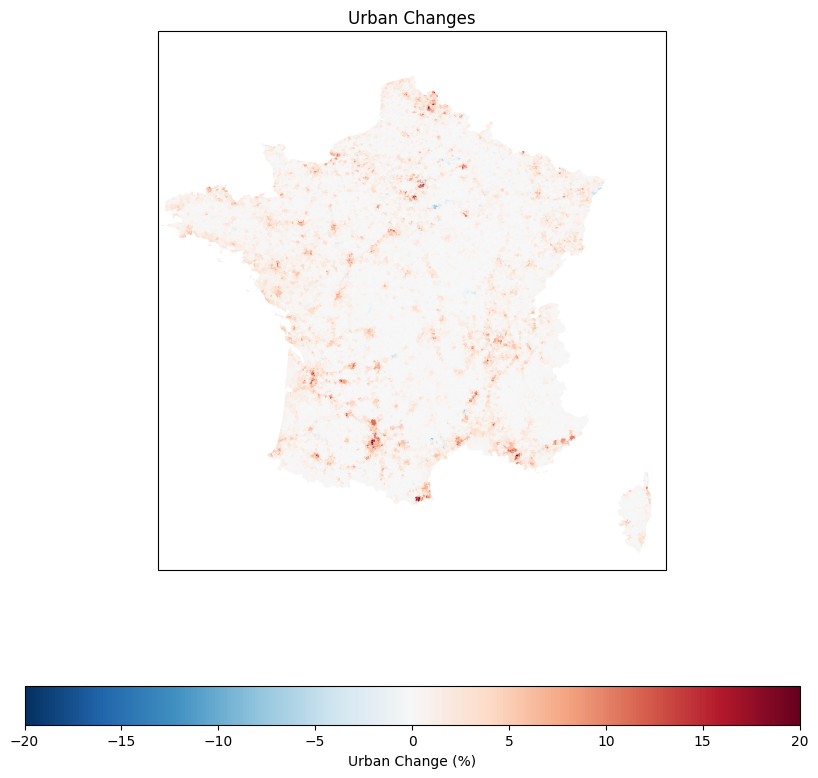

In [12]:
import cartopy.crs as ccrs
import cartopy.feature as cfeature

fig,ax = plt.subplots(1,1, figsize=(10,10), subplot_kw={'projection': ccrs.PlateCarree()})
nuts3.plot(column='urban', legend=True, cmap='RdBu_r', ax=ax, linewidth=1.2, transform=ccrs.PlateCarree(), legend_kwds={'orientation': 'horizontal', 'label': 'Urban Change (%)'}, vmax=20, vmin=-20)
ax.set_extent([-5, 10, 41, 52], crs=ccrs.PlateCarree())
ax.set_title('Urban Changes')

Text(0.5, 1.0, 'Forest Changes')

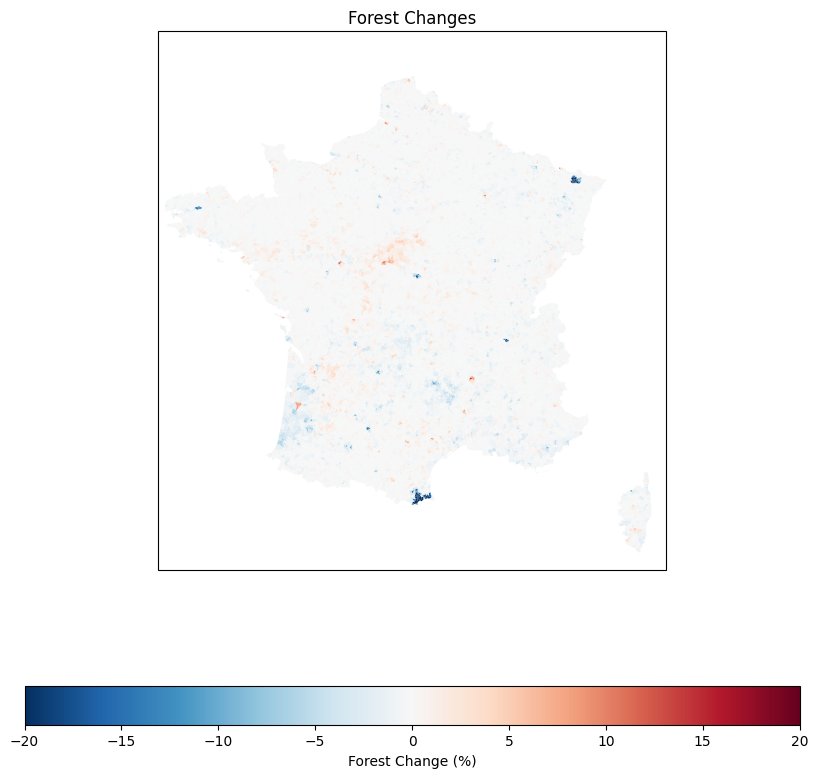

In [13]:
import cartopy.crs as ccrs
import cartopy.feature as cfeature

fig,ax = plt.subplots(1,1, figsize=(10,10), subplot_kw={'projection': ccrs.PlateCarree()})
nuts3.plot(column='forest', legend=True, cmap='RdBu_r', ax=ax, linewidth=1.2, transform=ccrs.PlateCarree(), legend_kwds={'orientation': 'horizontal', 'label': 'Forest Change (%)'}, vmax=20, vmin=-20)
ax.set_extent([-5, 10, 41, 52], crs=ccrs.PlateCarree())
ax.set_title('Forest Changes')

Text(0.5, 1.0, 'Cropland Changes')

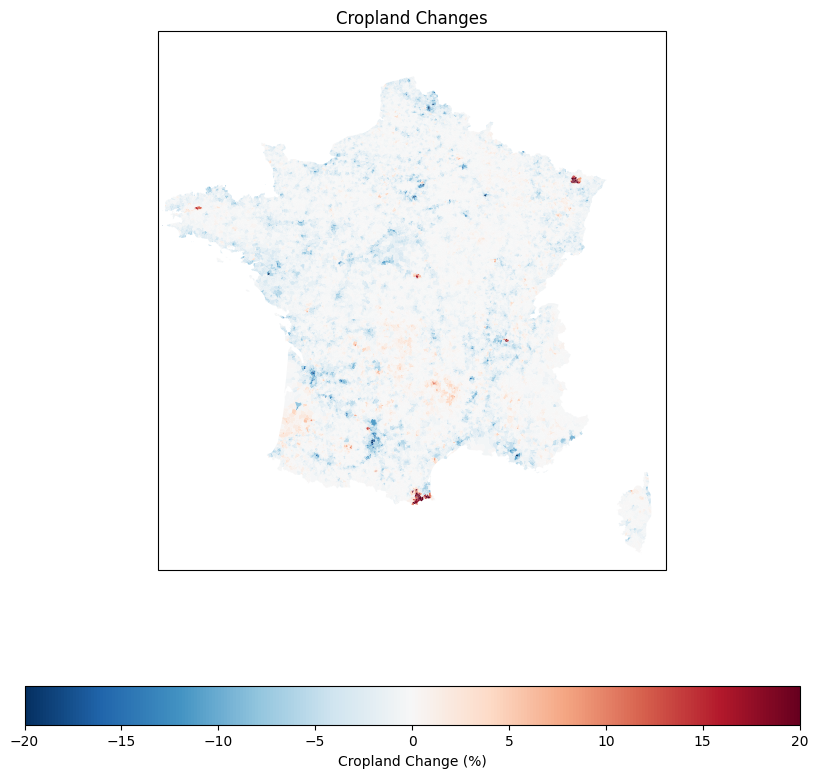

In [14]:
import cartopy.crs as ccrs
import cartopy.feature as cfeature

fig,ax = plt.subplots(1,1, figsize=(10,10), subplot_kw={'projection': ccrs.PlateCarree()})
nuts3.plot(column='cropland', legend=True, cmap='RdBu_r', ax=ax, linewidth=1.2, transform=ccrs.PlateCarree(), legend_kwds={'orientation': 'horizontal', 'label': 'Cropland Change (%)'}, vmax=20, vmin=-20)
ax.set_extent([-5, 10, 41, 52], crs=ccrs.PlateCarree())
ax.set_title('Cropland Changes')

Text(0.5, 1.0, 'Wetlands Changes')

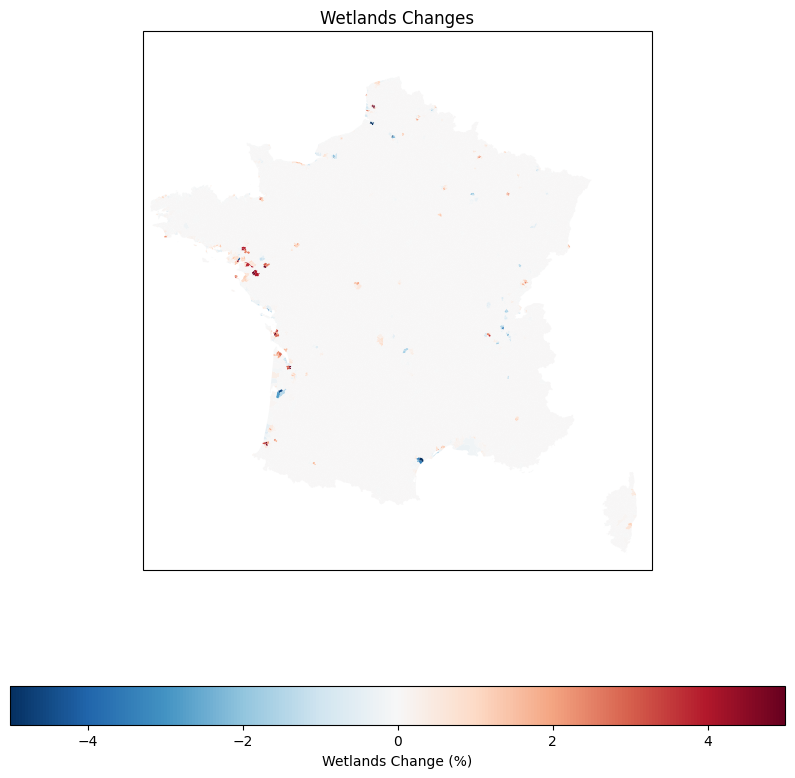

In [16]:
import cartopy.crs as ccrs
import cartopy.feature as cfeature

fig,ax = plt.subplots(1,1, figsize=(10,10), subplot_kw={'projection': ccrs.PlateCarree()})
nuts3.plot(column='wetland', legend=True, cmap='RdBu_r', ax=ax, linewidth=1.2, transform=ccrs.PlateCarree(), 
           legend_kwds={'orientation': 'horizontal', 'label': 'Wetlands Change (%)'}, vmax=5, vmin=-5)
ax.set_extent([-5, 10, 41, 52], crs=ccrs.PlateCarree())
ax.set_title('Wetlands Changes')

In [13]:
population_exposed = pd.read_excel('../../data/tiberiu/DATA_MH/Population%.xlsx')

In [14]:
lu_changes = lu_changes.merge(population_exposed, on='LAU_ID', how='left')

In [15]:
# Bootstrap resampling function
def bootstrap_ci(data1, data2, n_bootstrap=1000, ci=95):
    boot_diffs = []
    n1, n2 = len(data1), len(data2)
    
    for _ in range(n_bootstrap):
        sample1 = np.random.choice(data1, n1, replace=True)
        sample2 = np.random.choice(data2, n2, replace=True)
        boot_diffs.append(sample1.mean() - sample2.mean())
        
    lower = np.percentile(boot_diffs, (100 - ci) / 2)
    upper = np.percentile(boot_diffs, 100 - (100 - ci) / 2)
    return lower, upper


In [16]:
#for CF check if the mean urban wetland change is higher for the counties exposed vs the ones not exposed

mean_diff = lu_changes.dropna(subset=['pop%_CFL'])['urban'].mean() - lu_changes['urban'].mean()
conf_interval = 1.96 * (lu_changes.dropna(subset=['pop%_CFL'])['urban'].std() / np.sqrt(len(lu_changes.dropna(subset=['pop%_CFL']))))
print(f"Mean difference for CFL: {mean_diff}, 95% CI: [{mean_diff - conf_interval}, {mean_diff + conf_interval}]")

mean_diff = lu_changes.dropna(subset=['pop%_FL'])['urban'].mean() - lu_changes['urban'].mean()
conf_interval = 1.96 * (lu_changes.dropna(subset=['pop%_FL'])['urban'].std() / np.sqrt(len(lu_changes.dropna(subset=['pop%_FL']))))
print(f"Mean difference for FL: {mean_diff}, 95% CI: [{mean_diff - conf_interval}, {mean_diff + conf_interval}]")

mean_diff = lu_changes.dropna(subset=['pop%_WUI'])['urban'].mean() - lu_changes['urban'].mean()
conf_interval = 1.96 * (lu_changes.dropna(subset=['pop%_WUI'])['urban'].std() / np.sqrt(len(lu_changes.dropna(subset=['pop%_WUI']))))
print(f"Mean difference for WUI: {mean_diff}, 95% CI: [{mean_diff - conf_interval}, {mean_diff + conf_interval}]")

mean_diff = lu_changes.dropna(subset=['pop%_LNDSL'])['urban'].mean() - lu_changes['urban'].mean()
conf_interval = 1.96 * (lu_changes.dropna(subset=['pop%_LNDSL'])['urban'].std() / np.sqrt(len(lu_changes.dropna(subset=['pop%_LNDSL']))))
print(f"Mean difference for LNDSL: {mean_diff}, 95% CI: [{mean_diff - conf_interval}, {mean_diff + conf_interval}]")

mean_diff = lu_changes.dropna(subset=['pop%_EQ'])['urban'].mean() - lu_changes['urban'].mean()
conf_interval = 1.96 * (lu_changes.dropna(subset=['pop%_EQ'])['urban'].std() / np.sqrt(len(lu_changes.dropna(subset=['pop%_EQ']))))
print(f"Mean difference for EQ: {mean_diff}, 95% CI: [{mean_diff - conf_interval}, {mean_diff + conf_interval}]")

mean_diff = lu_changes.dropna(subset=['pop%_SUBS'])['urban'].mean() - lu_changes['urban'].mean()
conf_interval = 1.96 * (lu_changes.dropna(subset=['pop%_SUBS'])['urban'].std() / np.sqrt(len(lu_changes.dropna(subset=['pop%_SUBS']))))
print(f"Mean difference for SUBS: {mean_diff}, 95% CI: [{mean_diff - conf_interval}, {mean_diff + conf_interval}]")
                        

Mean difference for CFL: 0.8790953030393553, 95% CI: [0.7444091729129432, 1.0137814331657675]
Mean difference for FL: 0.46378824521397566, 95% CI: [0.41246078618760107, 0.5151157042403502]
Mean difference for WUI: 1.1560496870641932, 95% CI: [1.0088252573831469, 1.3032741167452395]
Mean difference for LNDSL: 0.058408101100205556, 95% CI: [0.026631769556080577, 0.09018443264433054]
Mean difference for EQ: 0.12010555372136777, 95% CI: [0.06790928332386795, 0.1723018241188676]
Mean difference for SUBS: 0.2104839463168986, 95% CI: [0.18535175911720378, 0.2356161335165934]


In [17]:
var = 'pop%_WUI'



mean_exposed = lu_changes.loc[lu_changes[var] > 0, 'urban'].mean()
mean_all = lu_changes['urban'].mean()
data_exposed = lu_changes.loc[lu_changes[var] > 0, 'urban']

thr = lu_changes.loc[lu_changes[var] > 0, var].quantile(0.90)
data_q90 = lu_changes.loc[lu_changes[var] > thr, 'urban']

delta = mean_exposed - mean_all

lower, upper = bootstrap_ci(data_exposed, lu_changes['urban'])
lower, upper = round(lower, 2), round(upper, 2)

print(f"Mean urban change for {var}: {round(delta, 2)}, 95% CI: [{lower}, {upper}]")

lower, upper = bootstrap_ci(data_q90, lu_changes['urban'])
lower, upper = round(lower, 2), round(upper, 2)

delta_bis = data_q90.mean() - mean_all

print(f"Mean urban change for {var} (top 10%): {round(delta_bis, 2)}, 95% CI: [{lower}, {upper}]")


Mean urban change for pop%_WUI: 1.18, 95% CI: [1.02, 1.34]
Mean urban change for pop%_WUI (top 10%): 0.65, 95% CI: [0.23, 1.11]


In [18]:
var_list = ['pop%_CFL', 'pop%_FL', 'pop%_WUI', 'pop%_LNDSL', 'pop%_EQ', 'pop%_SUBS']
for var in var_list:
    print(f"Variable: {var}")
    mean_exposed = lu_changes.loc[lu_changes[var] > 0, 'urban'].mean()
    mean_all = lu_changes['urban'].mean()
    data_exposed = lu_changes.loc[lu_changes[var] > 0, 'urban']

    thr = lu_changes.loc[lu_changes[var] > 0, var].quantile(0.90)
    data_q90 = lu_changes.loc[lu_changes[var] > thr, 'urban']

    delta = mean_exposed - mean_all

    lower, upper = bootstrap_ci(data_exposed, lu_changes['urban'])
    lower, upper = round(lower, 2), round(upper, 2)

    print(f"Mean urban change for {var}: {round(delta, 2)}, 95% CI: [{lower}, {upper}]")

    lower, upper = bootstrap_ci(data_q90, lu_changes['urban'])
    lower, upper = round(lower, 2), round(upper, 2)

    delta_bis = data_q90.mean() - mean_all

    print(f"Mean urban change for {var} (top 10%): {round(delta_bis, 2)}, 95% CI: [{lower}, {upper}]")

Variable: pop%_CFL
Mean urban change for pop%_CFL: 0.88, 95% CI: [0.74, 1.01]
Mean urban change for pop%_CFL (top 10%): 0.39, 95% CI: [0.1, 0.65]
Variable: pop%_FL
Mean urban change for pop%_FL: 0.47, 95% CI: [0.41, 0.52]
Mean urban change for pop%_FL (top 10%): 0.16, 95% CI: [-0.01, 0.32]
Variable: pop%_WUI
Mean urban change for pop%_WUI: 1.18, 95% CI: [1.02, 1.33]
Mean urban change for pop%_WUI (top 10%): 0.65, 95% CI: [0.26, 1.1]
Variable: pop%_LNDSL
Mean urban change for pop%_LNDSL: 0.06, 95% CI: [0.03, 0.1]
Mean urban change for pop%_LNDSL (top 10%): -0.56, 95% CI: [-0.62, -0.5]
Variable: pop%_EQ
Mean urban change for pop%_EQ: 0.27, 95% CI: [0.1, 0.43]
Mean urban change for pop%_EQ (top 10%): -0.02, 95% CI: [-0.54, 0.7]
Variable: pop%_SUBS
Mean urban change for pop%_SUBS: 0.03, 95% CI: [-0.01, 0.07]


C:\Users\colin\AppData\Local\Temp\ipykernel_47424\281357570.py:9: RuntimeWarning: Mean of empty slice.
  boot_diffs.append(sample1.mean() - sample2.mean())
c:\Users\colin\anaconda3\envs\xarray_env\Lib\site-packages\numpy\core\_methods.py:129: RuntimeWarning: invalid value encountered in scalar divide
  ret = ret.dtype.type(ret / rcount)


Mean urban change for pop%_SUBS (top 10%): nan, 95% CI: [nan, nan]


C:\Users\colin\AppData\Local\Temp\ipykernel_47424\281357570.py:9: RuntimeWarning: Mean of empty slice.
  boot_diffs.append(sample1.mean() - sample2.mean())
c:\Users\colin\anaconda3\envs\xarray_env\Lib\site-packages\numpy\core\_methods.py:129: RuntimeWarning: invalid value encountered in scalar divide
  ret = ret.dtype.type(ret / rcount)


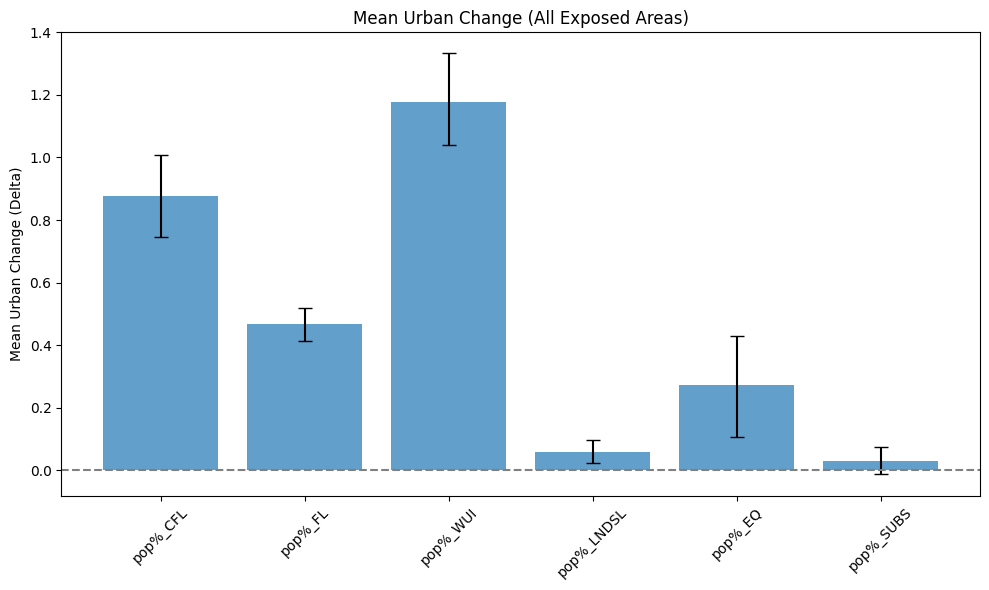

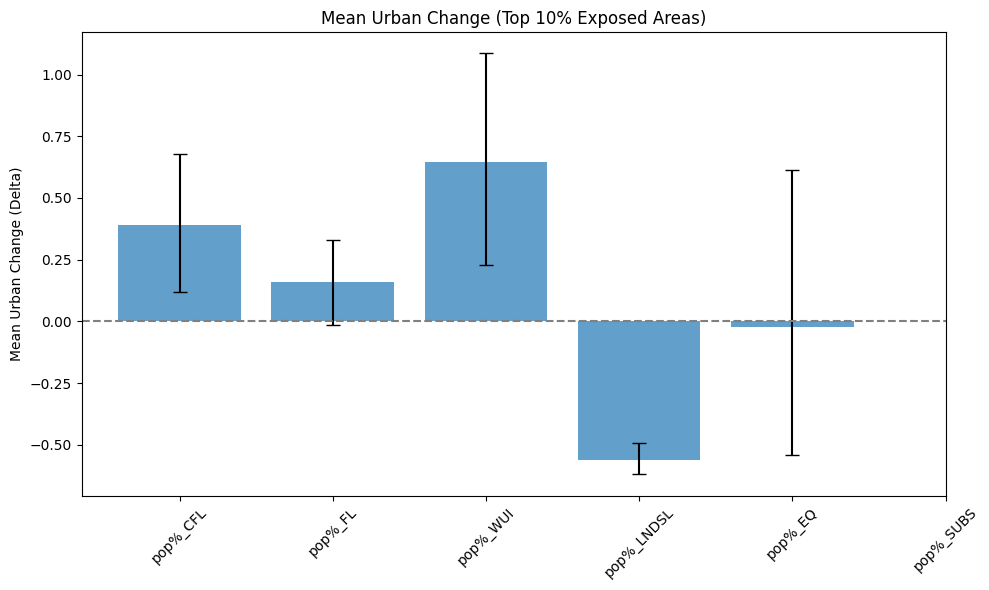

In [19]:
import matplotlib.pyplot as plt
import numpy as np

# Lists to store results
vars_labels = ['pop%_CFL', 'pop%_FL', 'pop%_WUI', 'pop%_LNDSL', 'pop%_EQ', 'pop%_SUBS']
deltas, ci_lowers, ci_uppers = [], [], []
deltas_bis, ci_lowers_bis, ci_uppers_bis = [], [], []

for var in vars_labels:
    mean_exposed = lu_changes.loc[lu_changes[var] > 0, 'urban'].mean()
    mean_all = lu_changes['urban'].mean()
    data_exposed = lu_changes.loc[lu_changes[var] > 0, 'urban']

    thr = lu_changes.loc[lu_changes[var] > 0, var].quantile(0.90)
    data_q90 = lu_changes.loc[lu_changes[var] > thr, 'urban']

    delta = mean_exposed - mean_all
    lower, upper = bootstrap_ci(data_exposed, lu_changes['urban'])

    deltas.append(delta)
    ci_lowers.append(lower)
    ci_uppers.append(upper)

    delta_bis = data_q90.mean() - mean_all
    lower_bis, upper_bis = bootstrap_ci(data_q90, lu_changes['urban'])

    deltas_bis.append(delta_bis)
    ci_lowers_bis.append(lower_bis)
    ci_uppers_bis.append(upper_bis)

# Plotting function
def plot_deltas_with_ci(labels, deltas, lowers, uppers, title):
    x = np.arange(len(labels))
    ci_err = [np.array(deltas) - np.array(lowers), np.array(uppers) - np.array(deltas)]

    plt.figure(figsize=(10, 6))
    plt.bar(x, deltas, yerr=ci_err, capsize=5, alpha=0.7)
    plt.axhline(0, color='gray', linestyle='--')
    plt.xticks(x, labels, rotation=45)
    plt.ylabel('Mean Urban Change (Delta)')
    plt.title(title)
    plt.tight_layout()
    plt.show()

# Plot for all exposed areas
plot_deltas_with_ci(vars_labels, deltas, ci_lowers, ci_uppers,
                    'Mean Urban Change (All Exposed Areas)')

# Plot for top 10% exposed areas
plot_deltas_with_ci(vars_labels, deltas_bis, ci_lowers_bis, ci_uppers_bis,
                    'Mean Urban Change (Top 10% Exposed Areas)')

### Now with climate data

In [20]:
data_new = pd.read_csv('../../data/indicesQ50_25021114242922763.txt', sep=';', comment='#', header=None)
data_new.columns = ['index', 'lat', 'lon', 'scenario', 'tasmax', 'day30', 'pr_cum', 'wf_risk', 'droughts_day', 'nan']
data_new = data_new.drop('nan', axis=1)

In [21]:

#map the data_new to each county in the shapefile based on the closest lat lon
from scipy.spatial import distance
def closest_node(node, nodes):
    closest_index = distance.cdist([node], nodes).argmin()
    return closest_index

shp_bis = nuts3.copy()
shp_bis = shp_bis.to_crs(epsg=4326)
shp_bis['lat'] = shp_bis.geometry.centroid.y
shp_bis['lon'] = shp_bis.geometry.centroid.x
shp_bis['index'] = shp_bis.apply(lambda x: closest_node([x['lat'], x['lon']], data_new[['lat', 'lon']].values), axis=1)



C:\Users\colin\AppData\Local\Temp\ipykernel_47424\1782476410.py:9: UserWarning: Geometry is in a geographic CRS. Results from 'centroid' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.

  shp_bis['lat'] = shp_bis.geometry.centroid.y
C:\Users\colin\AppData\Local\Temp\ipykernel_47424\1782476410.py:10: UserWarning: Geometry is in a geographic CRS. Results from 'centroid' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.

  shp_bis['lon'] = shp_bis.geometry.centroid.x


In [22]:
shp_bis['pr_cum'] = shp_bis['index'].apply(lambda x: data_new.loc[x, 'pr_cum'])
shp_bis['tasmax'] = shp_bis['index'].apply(lambda x: data_new.loc[x, 'tasmax'])
shp_bis['wf_risk'] = shp_bis['index'].apply(lambda x: data_new.loc[x, 'wf_risk'])
shp_bis['droughts_day'] = shp_bis['index'].apply(lambda x: data_new.loc[x, 'droughts_day'])
shp_bis['day30'] = shp_bis['index'].apply(lambda x: data_new.loc[x, 'day30'])

shp_bis['decile_pr_cum'] = pd.qcut(shp_bis['pr_cum'], 10, labels=False)
shp_bis['decile_tasmax'] = pd.qcut(shp_bis['tasmax'], 10, labels=False)
shp_bis['decile_wf_risk'] = pd.qcut(shp_bis['wf_risk'], 10, labels=False, duplicates='drop')
shp_bis['decile_droughts_day'] = pd.qcut(shp_bis['droughts_day'], 10, labels=False)
shp_bis['decile_day30'] = pd.qcut(shp_bis['day30'], 10, labels=False)

In [23]:
shp_bis['decile_urban'] = pd.qcut(shp_bis['urban'], 10, labels=False)
shp_bis['decile_forest'] = pd.qcut(shp_bis['forest'], 10, labels=False)
shp_bis['decile_cropland'] = pd.qcut(shp_bis['cropland'], 10, labels=False)
shp_bis['decile_wetland'] = pd.qcut(shp_bis['wetland'], 10, labels=False, duplicates='drop')

Variable: decile_pr_cum
Mean decile_pr_cum for urban (top 10%): 0.05, 95% CI: [-0.02, 0.13]
Variable: decile_tasmax
Mean decile_tasmax for urban (top 10%): 0.87, 95% CI: [0.79, 0.97]
Variable: decile_wf_risk
Mean decile_wf_risk for urban (top 10%): 0.65, 95% CI: [0.56, 0.73]
Variable: decile_droughts_day
Mean decile_droughts_day for urban (top 10%): 0.37, 95% CI: [0.29, 0.45]
Variable: decile_day30
Mean decile_day30 for urban (top 10%): 0.74, 95% CI: [0.65, 0.83]


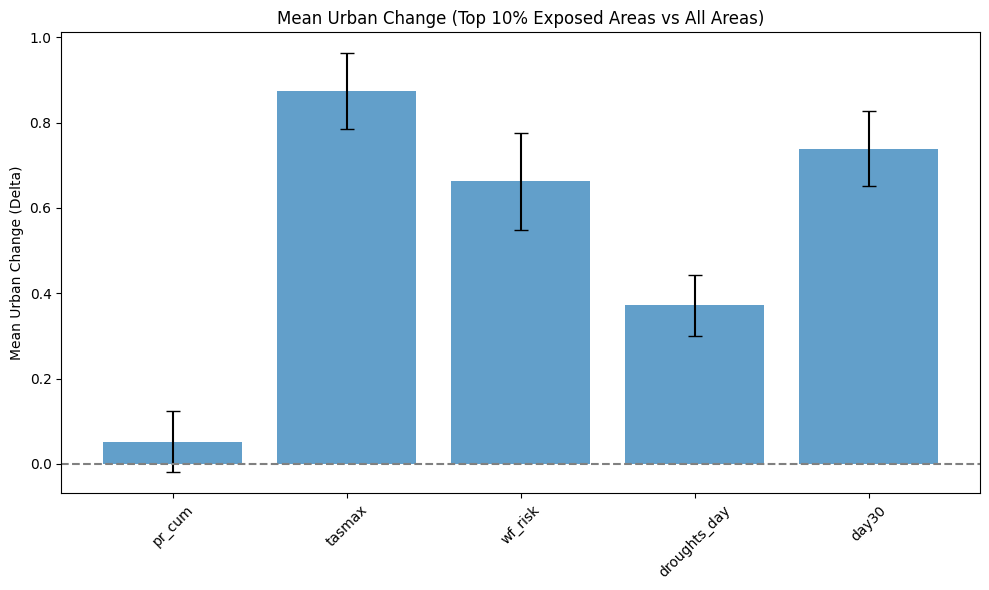

In [24]:
var_list = ['decile_pr_cum', 'decile_tasmax', 'decile_wf_risk', 'decile_droughts_day', 'decile_day30']
for var in var_list:
    print(f"Variable: {var}")
    mean_all = shp_bis['urban'].mean()
    data_q90 = shp_bis.loc[shp_bis[var] == shp_bis[var].max(), 'urban']

    lower, upper = bootstrap_ci(data_q90, shp_bis['urban'])
    lower, upper = round(lower, 2), round(upper, 2)

    delta_bis = data_q90.mean() - mean_all

    print(f"Mean {var} for urban (top 10%): {round(delta_bis, 2)}, 95% CI: [{lower}, {upper}]")

var_list = ['pr_cum', 'tasmax', 'wf_risk', 'droughts_day', 'day30']

deltas, ci_lowers, ci_uppers = [], [], []
deltas_bis, ci_lowers_bis, ci_uppers_bis = [], [], []

for var in var_list:
    mean_exposed = shp_bis.loc[shp_bis[var] > 0, 'urban'].mean()
    mean_all = shp_bis['urban'].mean()
    data_exposed = shp_bis.loc[shp_bis[var] > 0, 'urban']

    thr = shp_bis.loc[shp_bis[var] > 0, var].quantile(0.90)
    data_q90 = shp_bis.loc[shp_bis[var] > thr, 'urban']

    delta = mean_exposed - mean_all
    lower, upper = bootstrap_ci(data_exposed, shp_bis['urban'])

    deltas.append(delta)
    ci_lowers.append(lower)
    ci_uppers.append(upper)

    delta_bis = data_q90.mean() - mean_all
    lower_bis, upper_bis = bootstrap_ci(data_q90, shp_bis['urban'])

    deltas_bis.append(delta_bis)
    ci_lowers_bis.append(lower_bis)
    ci_uppers_bis.append(upper_bis)
# Plot for top 10% urban areas
plot_deltas_with_ci(var_list, deltas_bis, ci_lowers_bis, ci_uppers_bis,
                    'Mean Urban Change (Top 10% Exposed Areas vs All Areas)')


Variable: decile_pr_cum
Mean decile_pr_cum for cropland (top 10%): 0.34, 95% CI: [0.24, 0.46]
Variable: decile_tasmax
Mean decile_tasmax for cropland (top 10%): -0.78, 95% CI: [-0.9, -0.66]
Variable: decile_wf_risk
Mean decile_wf_risk for cropland (top 10%): -0.45, 95% CI: [-0.55, -0.34]
Variable: decile_droughts_day
Mean decile_droughts_day for cropland (top 10%): -0.41, 95% CI: [-0.51, -0.32]
Variable: decile_day30
Mean decile_day30 for cropland (top 10%): -0.75, 95% CI: [-0.85, -0.65]


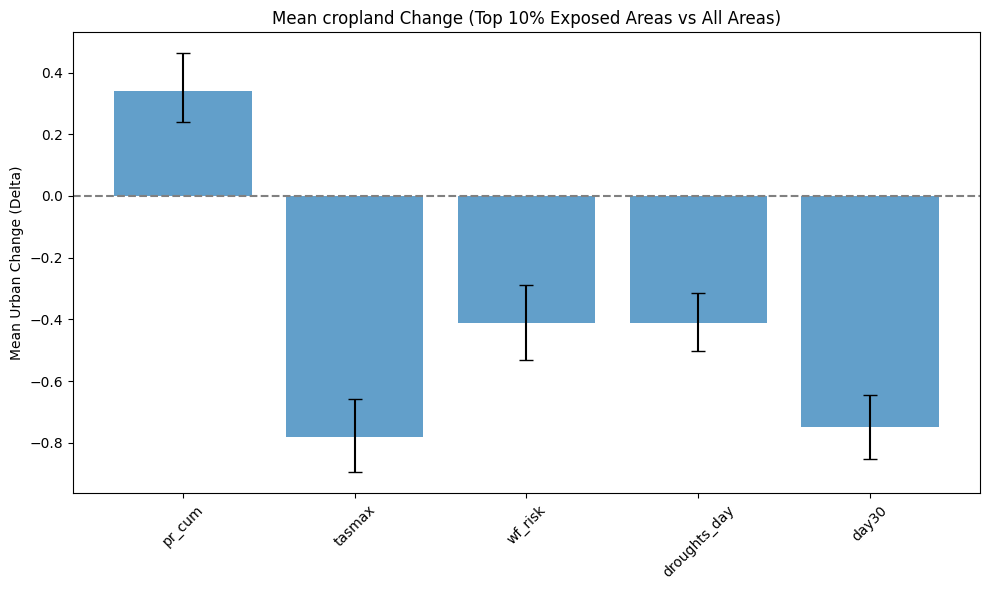

In [25]:
var_list = ['decile_pr_cum', 'decile_tasmax', 'decile_wf_risk', 'decile_droughts_day', 'decile_day30']
for var in var_list:
    print(f"Variable: {var}")
    mean_all = shp_bis['cropland'].mean()
    data_q90 = shp_bis.loc[shp_bis[var] == shp_bis[var].max(), 'cropland']

    lower, upper = bootstrap_ci(data_q90, shp_bis['cropland'])
    lower, upper = round(lower, 2), round(upper, 2)

    delta_bis = data_q90.mean() - mean_all

    print(f"Mean {var} for cropland (top 10%): {round(delta_bis, 2)}, 95% CI: [{lower}, {upper}]")

var_list = ['pr_cum', 'tasmax', 'wf_risk', 'droughts_day', 'day30']

deltas, ci_lowers, ci_uppers = [], [], []
deltas_bis, ci_lowers_bis, ci_uppers_bis = [], [], []

for var in var_list:
    mean_exposed = shp_bis.loc[shp_bis[var] > 0, 'cropland'].mean()
    mean_all = shp_bis['cropland'].mean()
    data_exposed = shp_bis.loc[shp_bis[var] > 0, 'cropland']

    thr = shp_bis.loc[shp_bis[var] > 0, var].quantile(0.90)
    data_q90 = shp_bis.loc[shp_bis[var] > thr, 'cropland']

    delta = mean_exposed - mean_all
    lower, upper = bootstrap_ci(data_exposed, shp_bis['cropland'])

    deltas.append(delta)
    ci_lowers.append(lower)
    ci_uppers.append(upper)

    delta_bis = data_q90.mean() - mean_all
    lower_bis, upper_bis = bootstrap_ci(data_q90, shp_bis['cropland'])

    deltas_bis.append(delta_bis)
    ci_lowers_bis.append(lower_bis)
    ci_uppers_bis.append(upper_bis)
# Plot for top 10% urban areas
plot_deltas_with_ci(var_list, deltas_bis, ci_lowers_bis, ci_uppers_bis,
                    'Mean cropland Change (Top 10% Exposed Areas vs All Areas)')


Variable: decile_pr_cum
Mean decile_pr_cum for forest (top 10%): -0.33, 95% CI: [-0.45, -0.23]
Variable: decile_tasmax
Mean decile_tasmax for forest (top 10%): -0.13, 95% CI: [-0.22, -0.05]
Variable: decile_wf_risk
Mean decile_wf_risk for forest (top 10%): -0.19, 95% CI: [-0.28, -0.12]
Variable: decile_droughts_day
Mean decile_droughts_day for forest (top 10%): -0.0, 95% CI: [-0.08, 0.07]
Variable: decile_day30
Mean decile_day30 for forest (top 10%): -0.03, 95% CI: [-0.09, 0.02]


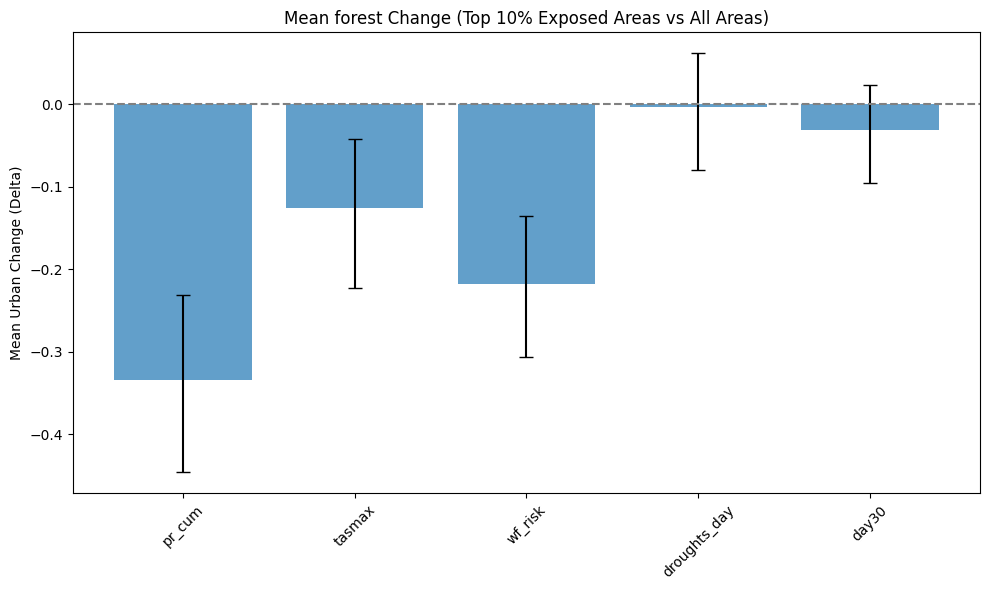

In [26]:
var_list = ['decile_pr_cum', 'decile_tasmax', 'decile_wf_risk', 'decile_droughts_day', 'decile_day30']
for var in var_list:
    print(f"Variable: {var}")
    mean_all = shp_bis['forest'].mean()
    data_q90 = shp_bis.loc[shp_bis[var] == shp_bis[var].max(), 'forest']

    lower, upper = bootstrap_ci(data_q90, shp_bis['forest'])
    lower, upper = round(lower, 2), round(upper, 2)

    delta_bis = data_q90.mean() - mean_all

    print(f"Mean {var} for forest (top 10%): {round(delta_bis, 2)}, 95% CI: [{lower}, {upper}]")

var_list = ['pr_cum', 'tasmax', 'wf_risk', 'droughts_day', 'day30']

deltas, ci_lowers, ci_uppers = [], [], []
deltas_bis, ci_lowers_bis, ci_uppers_bis = [], [], []

for var in var_list:
    mean_exposed = shp_bis.loc[shp_bis[var] > 0, 'forest'].mean()
    mean_all = shp_bis['forest'].mean()
    data_exposed = shp_bis.loc[shp_bis[var] > 0, 'forest']

    thr = shp_bis.loc[shp_bis[var] > 0, var].quantile(0.90)
    data_q90 = shp_bis.loc[shp_bis[var] > thr, 'forest']

    delta = mean_exposed - mean_all
    lower, upper = bootstrap_ci(data_exposed, shp_bis['forest'])

    deltas.append(delta)
    ci_lowers.append(lower)
    ci_uppers.append(upper)

    delta_bis = data_q90.mean() - mean_all
    lower_bis, upper_bis = bootstrap_ci(data_q90, shp_bis['forest'])

    deltas_bis.append(delta_bis)
    ci_lowers_bis.append(lower_bis)
    ci_uppers_bis.append(upper_bis)
# Plot for top 10% urban areas
plot_deltas_with_ci(var_list, deltas_bis, ci_lowers_bis, ci_uppers_bis,
                    'Mean forest Change (Top 10% Exposed Areas vs All Areas)')


### Sociodemographic data

In [28]:
disp_inc_2022 = gpd.read_file('../../data/disp_inc_2022.gpkg')
disp_inc_2022

,Year,AU_name,AU_code,ISO,Population,Disp_Inc_PPP_2015,Disp_Inc_PPP,Gini,Inc_Q,NUTS2,Entity,Gin_Q,geometry
0,2022,Bosnia-Herzgovina,None,BIH,3233526,NaN,NaN,0.33,s,None,Country,m,"POLYGON ((18.31409 42.62292, 18.30851 42.62146..."
